In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#import StringIO
#import zipfile
#import urllib
from __future__ import division, print_function

matplotlib.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
# Read the data file into a pandas DataFrame
df_fatality = pd.read_csv('C:/Mithun/study/Traffic-analysis/FARS2015NationalCSV_accident.csv')
df_fatality.head()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,...,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
0,1,10001,1,1,0,0,0,1,1,127,...,99,2,58,88,88,0,0,0,1,1
1,1,10002,1,1,0,0,0,1,1,83,...,99,22,20,88,88,0,0,0,1,0
2,1,10003,1,1,0,0,0,2,2,11,...,99,1,45,99,99,0,0,0,1,1
3,1,10004,1,1,0,0,0,1,1,45,...,99,1,15,88,88,0,0,0,1,1
4,1,10005,2,2,0,0,0,2,2,45,...,99,7,16,88,88,0,0,0,1,0


In [4]:
total_traffic_fatalities = df_fatality.FATALS.sum()
print("2015 Traffic Fatalities: ", total_traffic_fatalities)

2015 Traffic Fatalities:  35092


Motor Vehicles Are Third-Leading Cause of Death Due to Injury

In [5]:
# Get the rates
df_cdc = pd.read_csv('C:/Mithun/study/Traffic-analysis/cdc_injuries_2015.txt',delimiter='\t')
df_cdc['Rate'] = df_cdc['Deaths']/df_cdc['Population']/100000
df_cdc.head()

,Notes,Injury Mechanism & All Other Leading Causes,Injury Mechanism & All Other Leading Causes Code,Deaths,Population,Crude Rate,Rate
0,NaN,Cut/Pierce,GRINJ-001,2531.0,321418820.0,0.8,7.874461e-11
1,NaN,Drowning,GRINJ-002,4425.0,321418820.0,1.4,1.376708e-10
2,NaN,Fall,GRINJ-003,34488.0,321418820.0,10.7,1.072993e-09
3,NaN,Fire/Flame,GRINJ-004,3080.0,321418820.0,1.0,9.582513e-11
4,NaN,Hot object/Substance,GRINJ-005,66.0,321418820.0,0.0,2.053396e-12


In [6]:
# Create the series for plotting
df_cdc_rates = df_cdc.set_index('Injury Mechanism & All Other Leading Causes')['Rate']\
.dropna()\
.sort_values()
df_cdc_rates

Injury Mechanism & All Other Leading Causes
Overexertion                                              2.800085e-13
Hot object/Substance                                      2.053396e-12
Other Pedal cyclist                                       1.051587e-11
Machinery                                                 1.711163e-11
Other transport                                           2.666303e-11
Struck by or against                                      2.765862e-11
Other Pedestrian                                          2.983646e-11
Natural/Environmental                                     4.912593e-11
Other land transport                                      5.055709e-11
Other specified, not elsewhere classified Injury          5.805509e-11
Other specified, classifiable Injury                      6.536643e-11
Cut/Pierce                                                7.874461e-11
Non-Injury: Complications of medical and surgical care    8.356698e-11
Fire/Flame                       

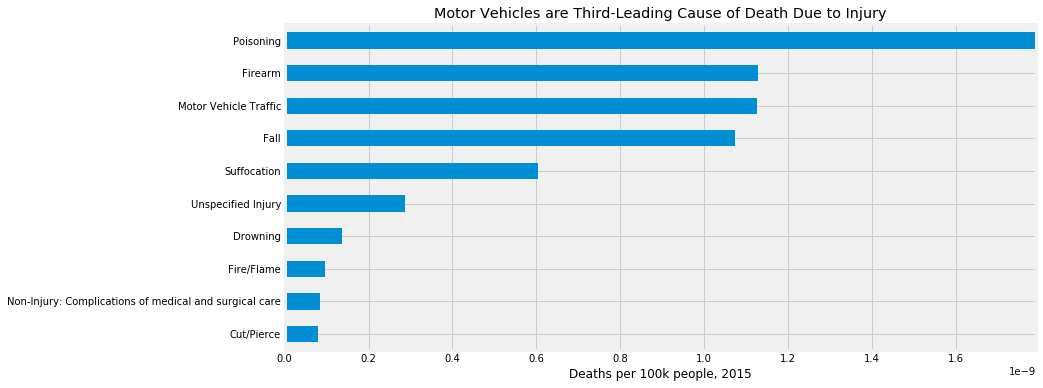

In [7]:
# Plot the top 10
plt.figure(figsize=(12,6))
df_cdc_rates.iloc[-10:].plot(kind='barh',
                           title='Motor Vehicles are Third-Leading Cause of Death Due to Injury')

plt.xlabel('Deaths per 100k people, 2015')
plt.ylabel('')
plt.show()

In [8]:
df_cdc_deaths = df_cdc.set_index('Injury Mechanism & All Other Leading Causes')['Deaths']\
.dropna()\
.sort_values()
df_cdc_deaths

Injury Mechanism & All Other Leading Causes
Overexertion                                                  9.0
Hot object/Substance                                         66.0
Other Pedal cyclist                                         338.0
Machinery                                                   550.0
Other transport                                             857.0
Struck by or against                                        889.0
Other Pedestrian                                            959.0
Natural/Environmental                                      1579.0
Other land transport                                       1625.0
Other specified, not elsewhere classified Injury           1866.0
Other specified, classifiable Injury                       2101.0
Cut/Pierce                                                 2531.0
Non-Injury: Complications of medical and surgical care     2686.0
Fire/Flame                                                 3080.0
Drowning                        

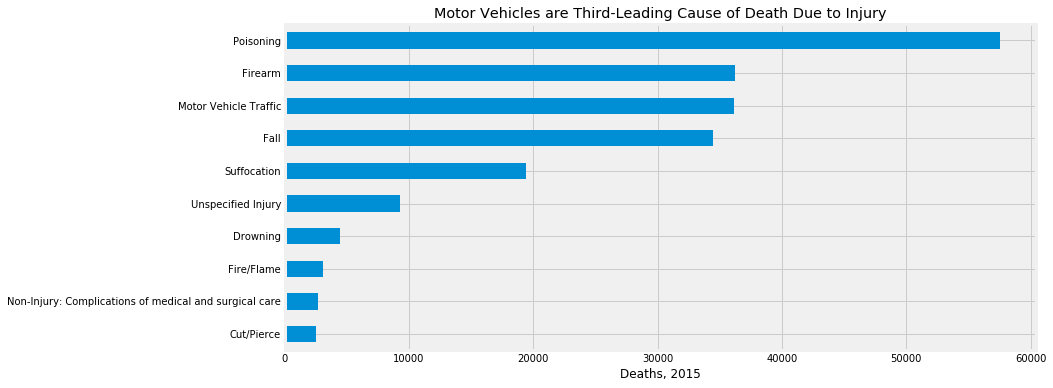

In [9]:
# Plot the top 10
plt.figure(figsize=(12,6))
df_cdc_deaths.iloc[-10:].plot(kind='barh',
                           title='Motor Vehicles are Third-Leading Cause of Death Due to Injury')
plt.xlabel('Deaths, 2015')
plt.ylabel('')
plt.show()

In [10]:
df_who = pd.read_csv('C:/Mithun/study/Traffic-analysis/who_2013_traffic_deaths.csv', skiprows=2,
                     index_col=0,names=['Country', 'Deaths', 'Death Rate'])
df_who.head()
df_who = df_who.reset_index()
df_who

,Country,Deaths,Death Rate
0,Afghanistan,4 734 [4 006 - 5 461],15.5
1,Albania,478 [435 - 521],15.1
2,Algeria,9 337 [7 985 - 10 689],23.8
3,Andorra,6,7.6
4,Angola,5 769 [4 626 - 6 912],26.9
5,Antigua and Barbuda,6,6.7
6,Argentina,5 619,13.6
7,Armenia,546 [503 - 588],18.3
8,Australia,1 252,5.4
9,Austria,455,5.4


In [11]:
print(df_who.shape)
#df_who.info()
#df_who.columns
#df_who['Country'].head()
#df_who= df_who[df_who['Country'] =='Country']
#df_who
#print(df_who.shape)
#print(df_who[['Country','Death Rate']])
#df_who.sort_values('Death Rate' ,ascending=False)[df_who['Country'] =='India']



####### Top 10 Death rate in the world in 2013
df_top10_deathRate =df_who.sort_values('Death Rate' ,ascending=False)
df_top10_deathRate.reset_index()
df_top10_deathRate.iloc[:10]

####### Top 10 Death rate in the world in 2013
df_top10_deathRate.iloc[-10:]


(179, 3)


,Country,Deaths,Death Rate
44,Denmark,196,3.5
96,Maldives,12,3.5
112,Netherlands,574,3.4
156,Switzerland,269,3.3
137,San Marino,1,3.2
169,United Kingdom of Great Britain and Northern I...,1 827,2.9
82,Kiribati,3,2.9
155,Sweden,272,2.8
103,Micronesia (Federated States of),2,1.9
104,Monaco,0,0.0


In [12]:
df_who_cp= df_who
df_who_cp.head()

,Country,Deaths,Death Rate
0,Afghanistan,4 734 [4 006 - 5 461],15.5
1,Albania,478 [435 - 521],15.1
2,Algeria,9 337 [7 985 - 10 689],23.8
3,Andorra,6,7.6
4,Angola,5 769 [4 626 - 6 912],26.9


In [13]:
plt.figure(figsize=(12,6))

# group of peer countries
country_group = ['Australia', 'Canada', 'France', 'Germany', 'Japan',
                 'United Kingdom of Great Britain and Northern Ireland', 'United States of America']
# labels for plot
country_labels = ['Australia', 'Canada', 'France', 'Germany', 'Japan',
                 'UK', 'USA']
df_who_cp = df_who_cp.set_index('Country')
#df_who_cp.loc[country_group]['Death Rate']



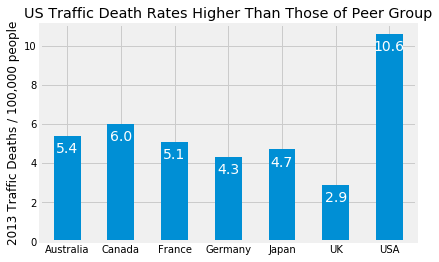

In [18]:
ax = df_who_cp.loc[country_group]['Death Rate'].plot(kind='bar')
plt.ylabel("2013 Traffic Deaths / 100,000 people")
plt.title("US Traffic Death Rates Higher Than Those of Peer Group")
plt.xticks(np.arange(len(country_group)), country_labels, rotation=0)
plt.xlabel('')


rects = ax.patches

def autolabel(rects):
    """Attach some labels."""
    
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., height - .3, '%0.1f'%height,
                ha='center', va='top', fontsize=14, color='w')
autolabel(rects)


plt.show()

In [23]:
# Load FARS fatality time series
df_annual = pd.read_csv('C:/Mithun/study/Traffic-analysis/fars_annual_trend.txt',delimiter='\t')
df_annual

,Year,Fatalities,Resident Population (Thousands),"Fatality Rate per 100,000 Population",Licensed Drivers (Thousands),"Fatality Rate per 100,000 Licensed Drivers",Registered Motor Vehicles (Thousands),"Fatality Rate per 100,000 Registered Vehicles",Vehicle Miles Traveled (Billions),Fatality Rate per 100 Million VMT,Unnamed: 10
0,1994,40716,260327,15.64,175403,23.21,192497,21.15,2358,1.73,NaN
1,1995,41817,262803,15.91,176628,23.68,197065,21.22,2423,1.73,NaN
2,1996,42065,265229,15.86,179539,23.43,201631,20.86,2484,1.69,NaN
3,1997,42013,267784,15.69,182709,22.99,203568,20.64,2552,1.65,NaN
4,1998,41501,270248,15.36,184861,22.45,208076,19.95,2628,1.58,NaN
5,1999,41717,272691,15.30,187170,22.29,212685,19.61,2690,1.55,NaN
6,2000,41945,282162,14.87,190625,22.00,217028,19.33,2747,1.53,NaN
7,2001,42196,284969,14.81,191276,22.06,221230,19.07,2796,1.51,NaN
8,2002,43005,287625,14.95,194602,22.10,225685,19.06,2856,1.51,NaN
9,2003,42884,290108,14.78,196166,21.86,230633,18.59,2890,1.48,NaN


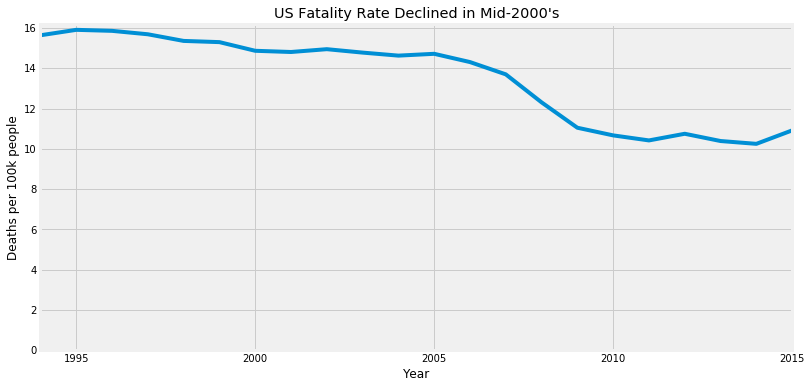

In [30]:
df_annual['Year']=pd.to_datetime(df_annual['Year'],format='%Y')
df_annual.head()
series_annual = df_annual.set_index('Year')['Fatality Rate per 100,000 Population']
# Add 2015 per capita, US 2015 Population available here:
# https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=PEP_2015_PEPANNRES&src=pt
series_annual[pd.to_datetime('2015-01-01')] = 35092 / (321418820 / 100000)
plt.figure(figsize=(12,6))
series_annual.plot()

plt.ylim(0)
plt.title('US Fatality Rate Declined in Mid-2000\'s')
plt.ylabel('Deaths per 100k people')

plt.show()

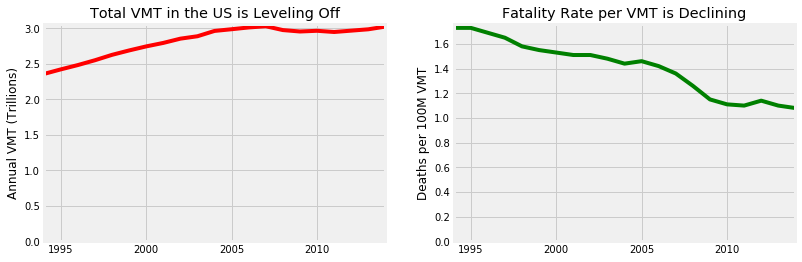

In [36]:
f, axarr = plt.subplots(1,2,figsize=(12,4))
df_annual['VMT (Trillions)'] = df_annual['Vehicle Miles Traveled (Billions)'] / 1000
df_annual.set_index('Year')['VMT (Trillions)'].plot(ax=axarr[0], 
                                                    title='Total VMT in the US is Leveling Off', color='red')
axarr[0].set_ylim(0)
axarr[0].set_xlabel('')
axarr[0].set_ylabel('Annual VMT (Trillions)')

df_annual.set_index('Year')['Fatality Rate per 100 Million VMT'].plot(ax=axarr[1], 
                                                    title='Fatality Rate per VMT is Declining',color='green'
                                             )
axarr[1].set_xlabel('')
axarr[1].set_ylim(0)
axarr[1].set_ylabel('Deaths per 100M VMT')
plt.show()

In [37]:
df_fatality.columns

Index(['STATE', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL', 'PEDS',
       'PERNOTMVIT', 'PERMVIT', 'PERSONS', 'COUNTY', 'CITY', 'DAY', 'MONTH',
       'YEAR', 'DAY_WEEK', 'HOUR', 'MINUTE', 'NHS', 'RUR_URB', 'FUNC_SYS',
       'RD_OWNER', 'ROUTE', 'TWAY_ID', 'TWAY_ID2', 'MILEPT', 'LATITUDE',
       'LONGITUD', 'SP_JUR', 'HARM_EV', 'MAN_COLL', 'RELJCT1', 'RELJCT2',
       'TYP_INT', 'WRK_ZONE', 'REL_ROAD', 'LGT_COND', 'WEATHER1', 'WEATHER2',
       'WEATHER', 'SCH_BUS', 'RAIL', 'NOT_HOUR', 'NOT_MIN', 'ARR_HOUR',
       'ARR_MIN', 'HOSP_HR', 'HOSP_MN', 'CF1', 'CF2', 'CF3', 'FATALS',
       'DRUNK_DR'],
      dtype='object')

In [38]:
df_fatality.head()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,...,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
0,1,10001,1,1,0,0,0,1,1,127,...,99,2,58,88,88,0,0,0,1,1
1,1,10002,1,1,0,0,0,1,1,83,...,99,22,20,88,88,0,0,0,1,0
2,1,10003,1,1,0,0,0,2,2,11,...,99,1,45,99,99,0,0,0,1,1
3,1,10004,1,1,0,0,0,1,1,45,...,99,1,15,88,88,0,0,0,1,1
4,1,10005,2,2,0,0,0,2,2,45,...,99,7,16,88,88,0,0,0,1,0


In [42]:
# Number of fatalities in crashes involving a drunken driver
df_dd = df_fatality[df_fatality['DRUNK_DR']>=1].FATALS.sum()
print("Fatalities involving a drunk driver: ", df_dd)
print("Percent of total traffic fatalities involving drunk driver: ", 
      '{0:.1f}%'.format(df_dd / total_traffic_fatalities * 100))

Fatalities involving a drunk driver:  9844
Percent of total traffic fatalities involving drunk driver:  28.1%


DRUNK_DR      0      1     2    3  DRUNK_DR_SUM
HOUR                                           
0         678.0  678.0  21.0  0.0         699.0
1         560.0  738.0  32.0  0.0         770.0
      No Drunk Driver  Drunk Driver
HOUR                               
0               678.0         699.0
1               560.0         770.0
2               505.0         801.0
3               462.0         568.0
4               485.0         339.0


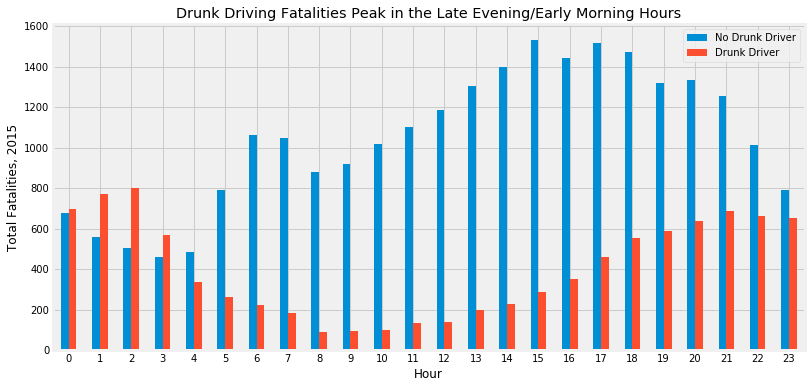

In [56]:
# pandas DataFrame pivot by hour that crash occurred and drunk driving
fatal_pivot = df_fatality.pivot_table(index=['HOUR'], columns=['DRUNK_DR'],
                                         values='FATALS', aggfunc=np.sum).fillna(0)
# Sum the total number of drunk drivers involved
fatal_pivot['DRUNK_DR_SUM'] = fatal_pivot[[1,2,3]].sum(axis=1)
print(fatal_pivot.iloc[:2])
fp = fatal_pivot[[0,'DRUNK_DR_SUM']].iloc[:-1].copy()
fp.columns = ['No Drunk Driver', 'Drunk Driver']
print(fp.head())
plt.rcParams['figure.figsize'] = (12,6)
#fp.plot()

fp.plot(kind='bar')

plt.xticks(rotation=0)

plt.title('Drunk Driving Fatalities Peak in the Late Evening/Early Morning Hours')
plt.ylabel('Total Fatalities, 2015')
plt.xlabel('Hour')

plt.show()


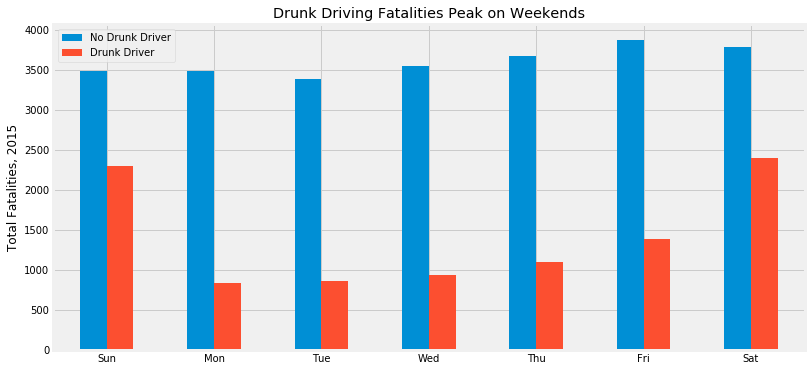

In [55]:
fatal_pivot = df_fatality.pivot_table(index=['DAY_WEEK'],columns=['DRUNK_DR']
                                     ,values='FATALS' , aggfunc=np.sum)
# Sum the total number of drunk drivers involved
fatal_pivot['DRUNK_DR_SUM'] = fatal_pivot[[1,2,3]].sum(axis=1)
fp = fatal_pivot[[0,'DRUNK_DR_SUM']].copy()
fp.columns = ['No Drunk Driver', 'Drunk Driver']
# Days of week are indexed 1=Sunday, 2=Monday, ..., 6=Saturday
labels=['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
fp.index = labels
fp.plot(kind='bar')

plt.xticks(rotation=0)
plt.ylabel('Total Fatalities, 2015')
plt.title('Drunk Driving Fatalities Peak on Weekends')

plt.show()

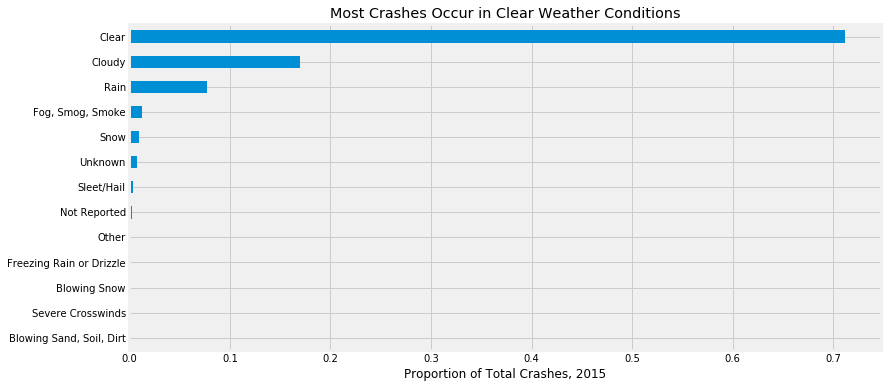

In [59]:
weather_group = df_fatality.groupby(['WEATHER']).sum()['FATALS']
labels = ['Clear', 'Rain', 'Sleet/Hail', 'Snow', 'Fog, Smog, Smoke',
          'Severe Crosswinds', 'Blowing Sand, Soil, Dirt', 'Other',
          'Cloudy', 'Blowing Snow', 'Freezing Rain or Drizzle', 'Not Reported', 'Unknown']
weather_group.index = labels

(weather_group.sort_values() / weather_group.sum()).plot(kind='barh')

plt.title('Most Crashes Occur in Clear Weather Conditions')
plt.xlabel('Proportion of Total Crashes, 2015')

plt.show()

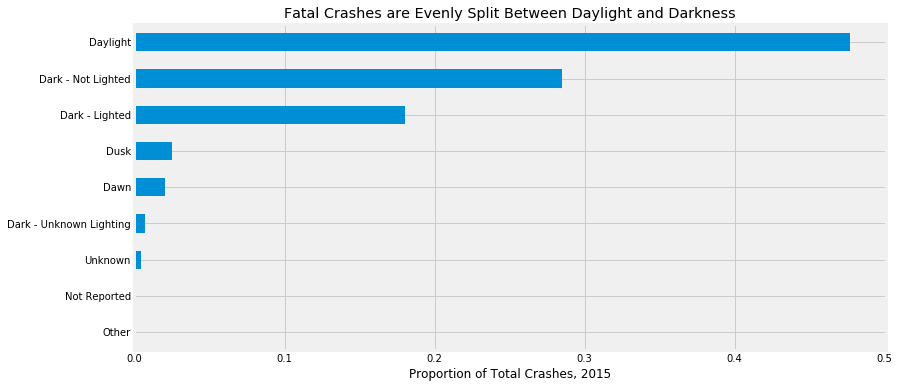

In [60]:
# pandas groupby on LGT_COND column
light_group = df_fatality.groupby(['LGT_COND']).sum()['FATALS']
labels = ['Daylight','Dark - Not Lighted', 'Dark - Lighted',
          'Dawn', 'Dusk', 'Dark - Unknown Lighting', 'Other',
          'Not Reported', 'Unknown']
light_group.index = labels

(light_group.sort_values() /  light_group.sum()).plot(kind='barh')

plt.title('Fatal Crashes are Evenly Split Between Daylight and Darkness')
plt.xlabel('Proportion of Total Crashes, 2015')

plt.show()